In [98]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [99]:
data=pd.read_csv('D:\Jbooks\Diabetes Prediction\data\diabetes.csv')


In [100]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [101]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [102]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [103]:
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [104]:
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Pregnancies']=data['Pregnancies'].replace(0,data['Pregnancies'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())

In [105]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

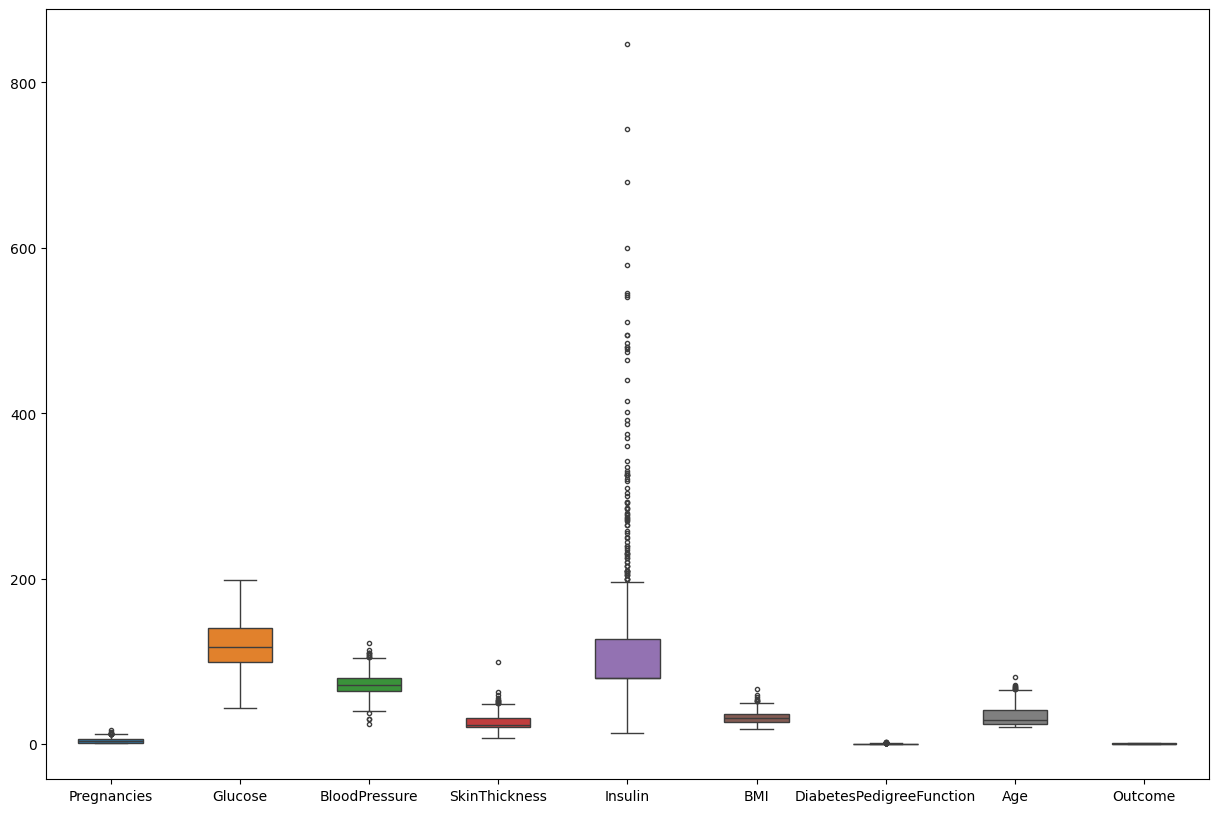

In [106]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data,ax=ax,width=0.5,fliersize=3)

In [107]:
# Independent feature
X=data.drop(columns=["Outcome"])
# Dependent Feature
y=data["Outcome"]

In [108]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [109]:
import pickle
def scaler_standard(X_train,X_test):
    scaler=StandardScaler()
    X_train_scaled=scaler.fit_transform(X_train)
    X_test_scaled=scaler.transform(X_test)

    # saving the module
    file=open(r"C:\Users\daksh\Machine Learning\Diabetes Prediction\models\standardScaler.pkl","wb")
    pickle.dump(scaler,file)
    file.close

    return X_train_scaled,X_test_scaled

In [110]:
X_train_scaled,X_test_scaled=scaler_standard(X_train,X_test)

In [111]:
log_reg=LogisticRegression()
log_reg.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [125]:
## hyperparameter grid search sc
from sklearn.model_selection import GridSearchCV
import numpy as np
import warnings
warnings.filterwarnings('ignore')
parameters={"penalty":['l1', 'l2'],
            'C':np.logspace(-3,3,7),
            "solver":['lbfgs', 'liblinear']}
            
clf=GridSearchCV(log_reg,param_grid=parameters,cv=10,scoring='accuracy')
clf.fit(X_train_scaled,y_train)

,estimator,LogisticRegre...r='liblinear')
,param_grid,"{'C': array([1.e-03...e+02, 1.e+03]), 'penalty': ['l1', 'l2'], 'solver': ['lbfgs', 'liblinear']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l1'


In [126]:
clf.best_params_

{'C': np.float64(1.0), 'penalty': 'l1', 'solver': 'liblinear'}

In [127]:
clf.best_index_

np.int64(13)

In [128]:
clf.best_score_

np.float64(0.7655474894131882)

In [129]:
y_pred=clf.predict(X_test_scaled)

In [130]:
log_reg=LogisticRegression(C=1,penalty='l2',solver="liblinear")

In [131]:
log_reg.fit(X_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [132]:
y_pred=log_reg.predict(X_test_scaled)

In [133]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [134]:
print("confusion matrix",confusion_matrix(y_pred,y_test))
print("accuracy",accuracy_score(y_pred,y_test))
print("precision",precision_score(y_pred,y_test))
print("recall",recall_score(y_pred,y_test))
print("F1 Score",f1_score(y_pred,y_test))
print("classification_report\n",classification_report(y_pred,y_test))


confusion matrix [[118  26]
 [ 12  36]]
accuracy 0.8020833333333334
precision 0.5806451612903226
recall 0.75
F1 Score 0.6545454545454545
classification_report
               precision    recall  f1-score   support

           0       0.91      0.82      0.86       144
           1       0.58      0.75      0.65        48

    accuracy                           0.80       192
   macro avg       0.74      0.78      0.76       192
weighted avg       0.83      0.80      0.81       192



In [135]:
import pickle
file=open(r"C:\Users\daksh\Machine Learning\Diabetes Prediction\models\modelForPrediction.pkl","wb")
pickle.dump(log_reg,file)
file.close()